<a href="https://colab.research.google.com/github/davidofitaly/algebra_stats_probability_ds_notes/blob/main/06_logistic_regression_basics_and_statistical_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from sympy import *
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import load_iris
from sklearn.metrics import log_loss
from scipy.stats import chi2
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

sns.set(font_scale=1.3)

###*Logistic Function*

#####The logistic function is a type of sigmoid function that maps any real-valued number into a range between 0 and 1. It is widely used in statistics, machine learning, and biology, especially for binary classification tasks.

##### The general form of the logistic function is:

$$
f(x) = \frac{1}{1 + e^{-(b_0 + b_1 x)}}
$$

##### Where:
- $f(x)$: Output of the logistic function (range between 0 and 1),
- $x$: Input value (can be any real number),
- $b_0$: Intercept (a parameter that shifts the curve along the x-axis),
- $b_1$: Slope (a parameter that controls the steepness of the curve).

##### **Properties:**
- The logistic function produces an "S" shaped curve, also known as a sigmoid curve.
- As $x \to \infty$, $f(x) \to 1$.
- As $x \to -\infty$, $f(x) \to 0$.
- The curve is symmetric around $x = -\frac{b_0}{b_1}$, where $f(x) = 0.5$.




#### Exercise 6.1


####Implement the logistic function and visualize it.

1. Define the logistic function in the form:
   $$
   p(x) = \frac{1}{1 + e^{-(b_0 + b_1 \cdot x)}}
   $$

2. Substitute the following values for the parameters:
   - $b_0 = 0$
   - $b_1 = 1$

3. Simplify the expression with the substituted values.

4. Plot the resulting logistic function.


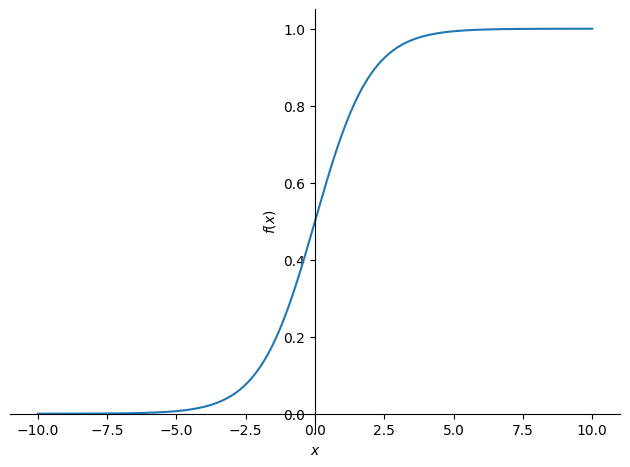

In [ ]:
b0, b1, x = symbols('b0 b1 x')

p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))

p = p.subs(b0, 0)
p = p.subs(b1, 1)


plot(p)


###Fitting the Logistic Curve

     x  y
0  1.0  0
1  1.5  0
2  2.1  0
3  2.4  0
4  2.5  1
Coefficients: 0.6394301762902932
Intercept: -2.9159294701778484


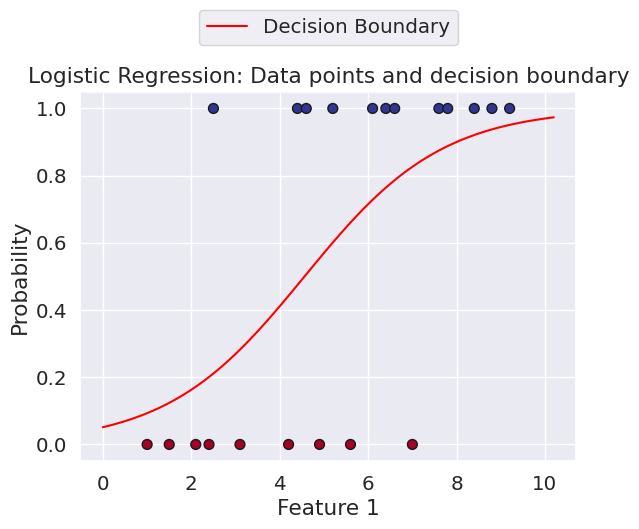

In [ ]:
df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=',')

print(df.head())

X = df.values[:, :-1]
Y = df.values[:, -1]

model = LogisticRegression()
model.fit(X,Y)

print(f"Coefficients: {model.coef_.flatten()[0]}")
print(f"Intercept: {model.intercept_.flatten()[0]}")

if X.shape[1] == 1:
    # Plot the data points
    plt.scatter(X, Y, c=Y, s=50, edgecolor='k', cmap='RdYlBu')

    # Plot the decision boundary as a vertical line
    x_vals = np.linspace(X.min() - 1, X.max() + 1, 100).reshape(-1, 1)
    y_vals = model.predict_proba(x_vals)[:, 1]

    plt.plot(x_vals, y_vals, color='red', label="Decision Boundary")

    # Add labels and title
    plt.title("Logistic Regression: Data points and decision boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Probability")
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=1)

    # Show the plot
    plt.show()


###*Logistic Regression with Multiple Variables*

#####Logistic Regression is a statistical method used to model the relationship between a binary dependent variable ($y$) and multiple independent variables ($x_1, x_2, \dots, x_n$). It is an extension of linear regression that is used for classification tasks, where the goal is to predict the probability of an outcome that can take one of two possible values.

##### General Formula:
#####The logistic regression model for multiple variables is expressed as:

$$
P(y = 1 | x_1, x_2, \dots, x_n) = \frac{1}{1 + e^{-(b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n)}}
$$

##### Where:
- $P(y = 1 | x_1, x_2, \dots, x_n)$: Probability of the outcome being 1 (success), given the values of the independent variables $x_1, x_2, \dots, x_n$.
- $b_0$: Intercept (bias) term.
- $b_1, b_2, \dots, b_n$: Coefficients for each independent variable $x_1, x_2, \dots, x_n$.
- $e$: Euler's number (approximately 2.718).



###*Logarithm of Odds (Log-Odds)*

#####Logarithm of odds, also known as **log-odds**, is a transformation of the odds of an event occurring. In the context of logistic regression, it is used to model the relationship between the independent variables and the probability of a binary outcome.

##### Definition:

#####The **odds** of an event occurring is the ratio of the probability of the event happening to the probability of it not happening. If $P(y=1)$ represents the probability of the event occurring (success), the odds are given by:

$$
\text{Odds} = \frac{P(y=1)}{1 - P(y=1)}
$$

The **log-odds** is the natural logarithm of the odds:

$$
\text{Log-Odds} = \log\left(\frac{P(y=1)}{1 - P(y=1)}\right)
$$

##### Relation to Logistic Regression:

#####In logistic regression, the log-odds of the probability of success is modeled as a linear combination of the independent variables. The general form of the logistic regression model is:

$$
\text{Log-Odds}(P) = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n
$$

#####Where:
- $P$: Probability of the event occurring.
- $b_0$: Intercept (bias term).
- $b_1, b_2, \dots, b_n$: Coefficients of the independent variables $x_1, x_2, \dots, x_n$.

The log-odds are then transformed using the **sigmoid function** to obtain a probability value between 0 and 1:

$$
P(y = 1 | x_1, x_2, \dots, x_n) = \frac{1}{1 + e^{-(b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n)}}
$$

##### Interpretation:

- **Coefficients**: Each coefficient $b_i$ represents the change in the log-odds of the outcome for a one-unit increase in the corresponding predictor variable $x_i$, holding all other variables constant.
  - A positive coefficient increases the odds of success (event occurring).
  - A negative coefficient decreases the odds of success.
- **Log-Odds to Probability**: The log-odds value is transformed into a probability between 0 and 1 by applying the sigmoid function. This is the key aspect of logistic regression, as it allows for a probabilistic interpretation.

##### Example:
If the log-odds equation for a logistic regression model is:

$$
\text{Log-Odds}(P) = -1.2 + 0.5 x_1 + 2.0 x_2
$$

This means:
- For each one-unit increase in $x_1$, the log-odds of success increase by 0.5.
- For each one-unit increase in $x_2$, the log-odds of success increase by 2.0.
- The intercept $b_0 = -1.2$ represents the log-odds of success when $x_1$ and $x_2$ are both 0.



###*$ R^2 $ in Logistic Regression (Based on Log-Likelihood)*

#####In logistic regression, the classic $ R^2 $ coefficient used in linear regression is not directly applicable due to the binary nature of the outcome variable and the non-linear relationship. However, a similar measure called **pseudo-$ R^2 $** is used to assess the goodness of fit of the model. One common method to calculate pseudo-$ R^2 $ is based on comparing the log-likelihood of the fitted model to the log-likelihood of the null model (model with no predictors).

##### **Formula for Pseudo-$ R^2 $:**

$$
R^2 = \frac{\log(L(\hat{\beta_0})) - \log(L(\hat{\beta}))}{\log(L(\hat{\beta_0}))}
$$

Where:
- $ \log(L(\hat{\beta_0})) $ is the log-likelihood of the null model (a model with only the intercept, no predictors),
- $ \log(L(\hat{\beta})) $ is the log-likelihood of the fitted model (a model with explanatory variables).

##### **Interpretation:**
- **$ R^2 = 0 $** means that the fitted model does not improve upon the null model and does not explain the data better than simply using the intercept.
- **$ R^2 = 1 $** means that the fitted model perfectly explains the data and is a significant improvement over the null model.
- Values between 0 and 1 indicate the degree of improvement in model fit. The closer the value is to 1, the better the fitted model explains the data compared to the null model.

##### **Why Use Pseudo-$ R^2 $?**
- The classic $ R^2 $ is not suitable for logistic regression due to the nature of the data (binary outcomes). Pseudo-$ R^2 $ provides a way to evaluate how well the model fits the data relative to a baseline (null) model.
- It is important to note that pseudo-$ R^2 $ does not have the same interpretation as the traditional $ R^2 $ in linear regression and should not be treated as a direct measure of explained variance.

##### **Example:**
- If the log-likelihood of the null model is $ \log(L(\hat{\beta_0})) = -500 $ and the log-likelihood of the fitted model is $ \log(L(\hat{\beta})) = -400 $, the pseudo-$ R^2 $ is calculated as:

$$
R^2 = \frac{-500 - (-400)}{-500} = \frac{-100}{-500} = 0.2
$$

This means the fitted model explains 20% of the improvement in log-likelihood compared to the null model.

##### **Summary:**
- Pseudo-$ R^2 $ is a way of evaluating the fit of a logistic regression model, based on the improvement in log-likelihood over the null model.
- A higher value of pseudo-$ R^2 $ indicates that the model explains more of the variance in the data.


In [14]:
# Load the dataset
df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=',')

# Extract features and target variable
X = df.values[:, :-1]
Y = df.values[:, -1]

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X, Y)

# Log-likelihood for the fitted model
y_probs_fitted = model.predict_proba(X)[:, 1]  # Probability of the positive class
log_likelihood_fitted = -log_loss(Y, y_probs_fitted) * len(Y)  # log_loss returns negative log-likelihood

# Null model (model with only intercept, no features)
model_null = LogisticRegression(fit_intercept=True)
model_null.fit(np.ones((X.shape[0], 1)), Y)  # Use only intercept (constant)
y_probs_null = model_null.predict_proba(np.ones((X.shape[0], 1)))[:, 1]
log_likelihood_null = -log_loss(Y, y_probs_null) * len(Y)  # log_loss returns negative log-likelihood

# Calculate pseudo-R^2
pseudo_r_squared = (log_likelihood_null - log_likelihood_fitted) / log_likelihood_null

# Print the results
print(f"Log-Likelihood for the fitted model: {log_likelihood_fitted}")
print(f"Log-Likelihood for the null model: {log_likelihood_null}")
print(f"Pseudo-R^2: {pseudo_r_squared}")

Log-Likelihood for the fitted model: -9.962837414746899
Log-Likelihood for the null model: -14.341070285021
Pseudo-R^2: 0.30529331376662244


###*P-value for Logistic Regression (Chi-Square)*

#####In logistic regression, the p-value tests if an explanatory variable significantly affects the dependent variable. This is done using the Chi-square test.

#### **Chi-Square Test Statistic**:
$$
\chi^2 = 2 \times \left( \text{log-likelihood of full model} - \text{log-likelihood of null model} \right)
$$

#####The p-value is derived from the Chi-square statistic and indicates whether the variable is statistically significant. A p-value < 0.05 means the variable significantly affects the outcome.


In [16]:
# Calculate the chi-square statistic
chi_square_stat = 2 * (log_likelihood_null - log_likelihood_fitted)

# Degrees of freedom: number of parameters in the full model (excluding the intercept)
df_model = X.shape[1]

# Calculate the p-value for the chi-square statistic
p_value = 1 - chi2.cdf(chi_square_stat, df_model)

# Print the results
print(f"Chi-Square Statistic: {chi_square_stat}")
print(f"P-value: {p_value}")

Chi-Square Statistic: -8.756465740548204
P-value: 1.0


In [25]:
df = pd.read_csv('https://bit.ly/3cManTi')

X = df.values[:, :-1]
Y = df.values[:, -1]

model = LogisticRegression(solver='liblinear')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.33, random_state=42)

model.fit(X_train, y_train)

forecast = model.predict(X_test)

confusion = confusion_matrix(y_true = y_test, y_pred=forecast)

print(confusion)


[[6 5]
 [2 5]]
